# Finding thickness of the thin-films

Measuring the thickness of the thin-film is a very challenging task. X-ray reflectivity (XRR) is one of the most popular ways of measuring films thicknesses in the range 5 - 100 nm. In XRR, the X-rays are incident on the sample at very low angles, and when the angle of incidence exceeds the critical angle ($\theta_c$), some of the X-rays penetrate into the sample. These penetrated X-rays are reflected back at the interface between the film and the substrate, which then interfere with the X-rays reflected from the film surface, resulting in angle dependent periodic fringe pattern (called Kiessig fringes) proportional to the thickness of the film. Hence from the measurement of width of the fringes, one can estimate the film thickness. The XRR is also useful in understanding the surface/ interface roughness, since the surface roughness decreases the reflected intensity causing the non-specular reflection. 

There are several commercially available software that can help fitting the XRR pattern and estimate the film thickness. One such software that is based on differential evolution algorithm is GenX [[Link]](http://scripts.iucr.org/cgi-bin/paper?S0021889807045086). However, it takes a while to get acquinted with the software and to generate a sensible fit to the experimental data. In this notebook, we show two alternative approaches that one can employ to get a quick insight about the film thickness.

#### Method 1:

For a film with thickness t, the $m^{th}$ interference maximum is obtained at; $$\theta_m^2 = (\frac{m\lambda}{2t})^2 + \theta_c^2 \tag{1}$$
where $\theta_c = \sqrt{\frac{\lambda^2SLD}{\pi}}$ is the critical angle (depends on the film material) and $\lambda$ is wavelength of X-ray radiation. To find the scattering length density (SLD) for a material, one can use the NIST SLD calculator [[Link]](https://www.ncnr.nist.gov/resources/activation/).
With the experimentally measured values of peak positions and the orders of peaks, one can solve equation (1) and extract the film thickness.

#### Method 2:

For small $\theta$ (which gives larger d spacing), one can utilize the usual Bragg equation to estimate the film thickness;
$$ m\lambda = 2tsin\theta_m \tag{2}$$

The Bragg method does not account for the influence of refractive index of the material on the refracted X-rays, hence if there are only few fringes and only upto a few degrees, this method does not produce a more accurate estimate of film thickness. The estimated thickness of the two methods will be closer if the fringes are obtained upto higher angles (6-7 $^{\circ}$). Hence, in case the two thickness differ significanlty, it is recommended to choose `method 1` over `method 2`.


##### Enter the peak positions, the order of the peaks, and the wavelength of the X-ray radiation.

In [24]:
twoT = [1.0246,1.3601,1.7163,2.0725,2.3996,2.8065,3.2264,3.6595,4.1047,4.5588,5.0386]   # fill up the maxima positions 2theta
nlis=[1,2,3,4,5,6,7,8,9,10,11]     # order of maxima

assert len(twoT) == len(nlis), "the no. of peak positions must match the order of peak"
wavelength = 1.540589   # this is for Cu radiation

#### Find SLD as above and use it to find $\theta_c$

In [81]:
sld = 61.242e-6
theta_c = np.sqrt((np.power(wavelength,2)*sld)/np.pi)
theta_c

0.006801998610017883

In [88]:
import numpy as np
xlis =[]
x_quad_lis=[]
yerr_quad_lis=[]
y_quad_lis=[]
thickness_lis=[]
thickness1_lis=[]
for i in range(len(twoT)):
    x = (2*np.sin(np.radians(twoT[i]/2)))  # For method 2
    xlis.append(x)
    x_quad = (np.power(nlis[i],2))/4   # For method 1
    x_quad_lis.append(x_quad)
    y_quad = np.power(np.radians(twoT[i]/2),2)- np.power(theta_c,2)
    y_quad_lis.append(y_quad)
    yerr_quad = nlis[i]*.05*y_quad    # adding error in the angle measurement
    yerr_quad_lis.append(yerr_quad)
    
arrayx=np.array(xlis)
arrayn = np.array(nlis)
arrayx_quad =np.array(x_quad_lis)
arrayy_quad=np.array(y_quad_lis)    

### Method 1

In [85]:
from scipy.optimize import curve_fit
def method1_fit(x, *p):
    slope_, intercept_ = p
    return 1.0/(1.0/(slope_*x -intercept_))

p0 = np.array([200, 0.006])  # initial value of thickness and critical angle

fit_wrapper = np.vectorize(method1_fit)

popt, pcov = curve_fit(fit_wrapper, arrayx_quad, arrayy_quad, p0)

thickness = (wavelength/np.sqrt(popt[0]))/10              # thickness in nm
thickness_err = (np.sqrt(np.diag(pcov)[0])*thickness)/(2*popt[0])  # finding error
print("Thickness of the film using Method 1: {:.2f} \u00B1 {:.2f} nm".format(thickness, thickness_err))


Thickness of the film using Method 1: 19.78 ± 0.09 nm


### Method 2

In [103]:
slope,cov = np.polyfit(arrayn,arrayx,1, cov=True)   # fitting equation (2)
thickness_bragg = (wavelength/slope[0])/10
thickness_err_bragg = (np.sqrt(np.diag(cov)[0])*thickness)/(slope[0])
print("Thickness of the film using Method 2: {:.2f} \u00B1 {:.2f} nm".format(thickness_bragg, thickness_err_bragg))

Thickness of the film using Method 2: 22.06 ± 0.41 nm


#### Visualizing the data and the fit results

Text(0.5, 1.0, 'Method 1')

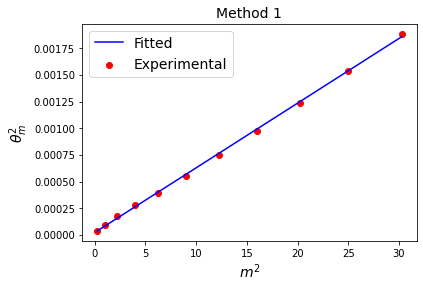

In [80]:
import matplotlib.pyplot as plt
plt.scatter(arrayx_quad,arrayy_quad, color='red', label="Experimental")
plt.plot(arrayx_quad,(popt[0]*arrayx_quad-popt[1]), color='blue', label='Fitted' )
plt.legend(fontsize=14)
plt.ylabel(r'$\theta_m^2$', fontsize=14)
plt.xlabel(r'$m^2$', fontsize=14)
plt.title('Method 1', fontsize = 14)

Text(0.5, 1.0, 'Method 2')

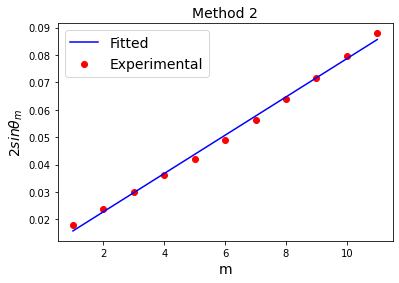

In [100]:
import matplotlib.pyplot as plt
plt.scatter(arrayn,arrayx ,color='red', label="Experimental")
plt.plot(arrayn,(slope[0]*arrayn)+slope[1], color='blue', label='Fitted' )
plt.legend(fontsize=14)
plt.ylabel(r'$2sin\theta_m$', fontsize=14)
plt.xlabel(r'm', fontsize=14)
plt.title('Method 2', fontsize = 14)

The thicknesses predicted by the two methods differ by 2 nm. Hence, it is reasonable to believe that the true film thickness is around 20 nm. Form the visualization of fits on the experimental data, one can observe that method 1 fits slightly better than the method 2. Hence, the thickness estimated by method 1 should be closer to the actual thickness, which was infact the case as the GenX fitting also yielded a thickness of 19.50 nm for this film.